In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

### Definición de Clase Particulas

In [9]:
class Particles:

    particle_list = list()
    p = 0.5

    def __init__(self, x_initial):
        Particles.particle_list.append(self)
        self.x = x_initial

    def step(self):
        d = np.random.binomial(1,self.p)
        self.x += 2*d - 1

    @classmethod
    def positions(cls):
        L = len(cls.particle_list)
        Par_x = np.zeros(L)
        for i,particle in zip(range(L),cls.particle_list):
            Par_x[i] = particle.x
        return Par_x
        

### Inicialización de N particulas

In [10]:
N = 5000
for i in range(N):
    pos = i%4
    if pos==0 or pos==1:
        Particles(x_initial=0)
    elif pos==2:
        Particles(x_initial=1)
    elif pos==3:
        Particles(x_initial=-1)


### Simulación con M pasos

In [11]:
M = 2000
for n in range(M):
    for particle in Particles.particle_list:
        particle.step()

positions = Particles.positions()

### Postprocessing

In [12]:
mu = np.mean(positions)
sigma = np.std(positions)
print('mu =',mu)
print('sigma =',sigma)

mu = 0.3304
sigma = 44.91166035496796


In [13]:
mu_teo = (2*Particles.p-1)*M
sigma_teo = 2*np.sqrt(M*Particles.p*(1-Particles.p))
print('mu_teo =',mu_teo)
print('sigma_teo =',sigma_teo)

mu_teo = 0.0
sigma_teo = 44.721359549995796


In [14]:
z1 = mu_teo - 5*sigma_teo
z2 = mu_teo + 5*sigma_teo
x = np.linspace(z1,z2,1000)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (x - mu))**2))

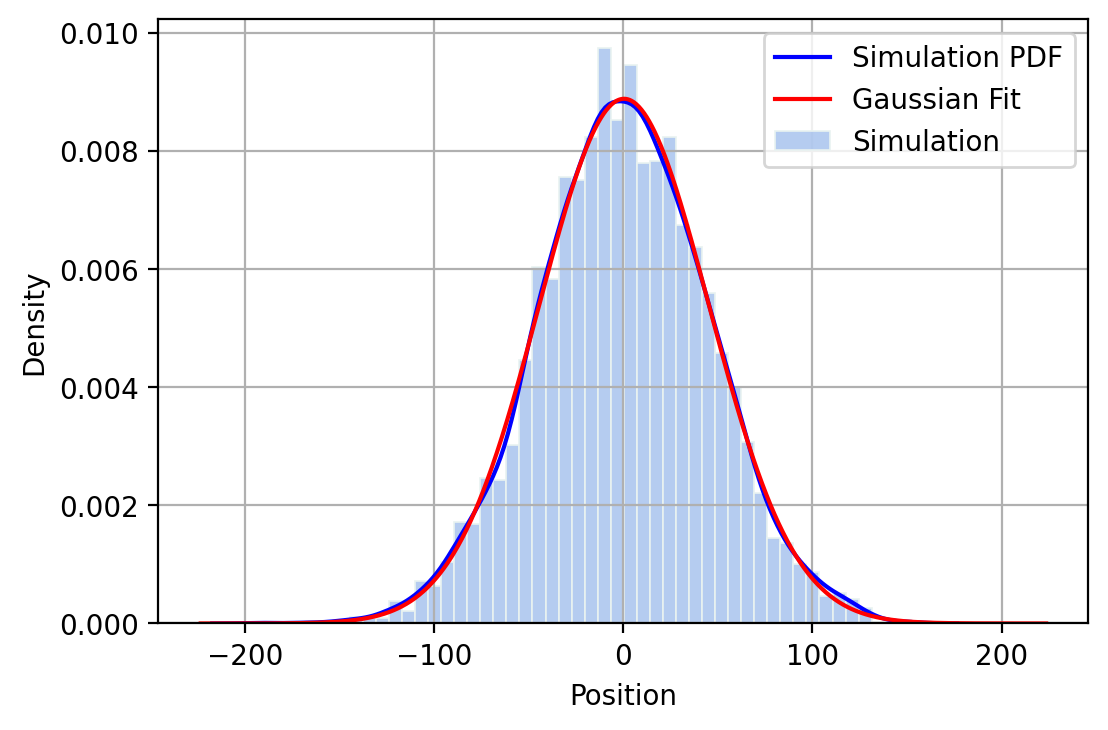

In [15]:
sns.histplot(positions, stat='density', label='Simulation', color='#9dbbeb', edgecolor='#e9f2f1')
sns.kdeplot(positions, c='b', label='Simulation PDF')
sns.lineplot(x=x,y=y, c='r', label='Gaussian Fit')

plt.grid()
plt.xlabel('Position');

In [16]:
dmu = np.abs(mu-mu_teo)
dsigma = np.abs(sigma-sigma_teo)/sigma_teo
print('dmu =',dmu)
print('dsigma/sigma =',dsigma)

dmu = 0.3304
dsigma/sigma = 0.004255255360906811


In [17]:
tau = 1e-6
D = sigma**2/(2*M*tau)
print('D =',D)
D_teo = sigma_teo**2/(2*M*tau) 
print('D_teo',D_teo)

D = 504264.3089600001
D_teo 500000.00000000006


### Varias muestras

Reiniciar la clase antes de correr este código

In [19]:
L_mu = list()
L_sigma = list()


N = 1000
for i in range(N):
    pos = i%4
    if pos==0 or pos==1:
        Particles(x_initial=0)
    elif pos==2:
        Particles(x_initial=1)
    elif pos==3:
        Particles(x_initial=-1)

M = 1000
Samples = 10
for _ in range(Samples):
    for n in range(M):
        for particle in Particles.particle_list:
            particle.step()

    positions = Particles.positions()


    L_mu.append(np.mean(positions))
    L_sigma.append(np.std(positions))

In [21]:
L_mu

[0.38, 0.1, 4.88, 2.7, 0.26, 5.38, 6.34, 5.66, 8.96, 12.28]

In [20]:
print(np.mean(L_mu))
print(np.std(L_sigma))

4.694000000000001
18.63087434921129


### Error en simulaciones

In [20]:
x = [100,1000,5000,10000,20000]

dmu1 = [0.292,0.766,0.102,1.45,6.978]
dsig1 = [0.107,0.0027,0.039,0.125,0.0012]

dmu2 = [0.0468,0.5574,0.0548,0.1092,0.3898]
dsig2 = [0.000696,0.0038,0.0132,0.000487,0.00347]



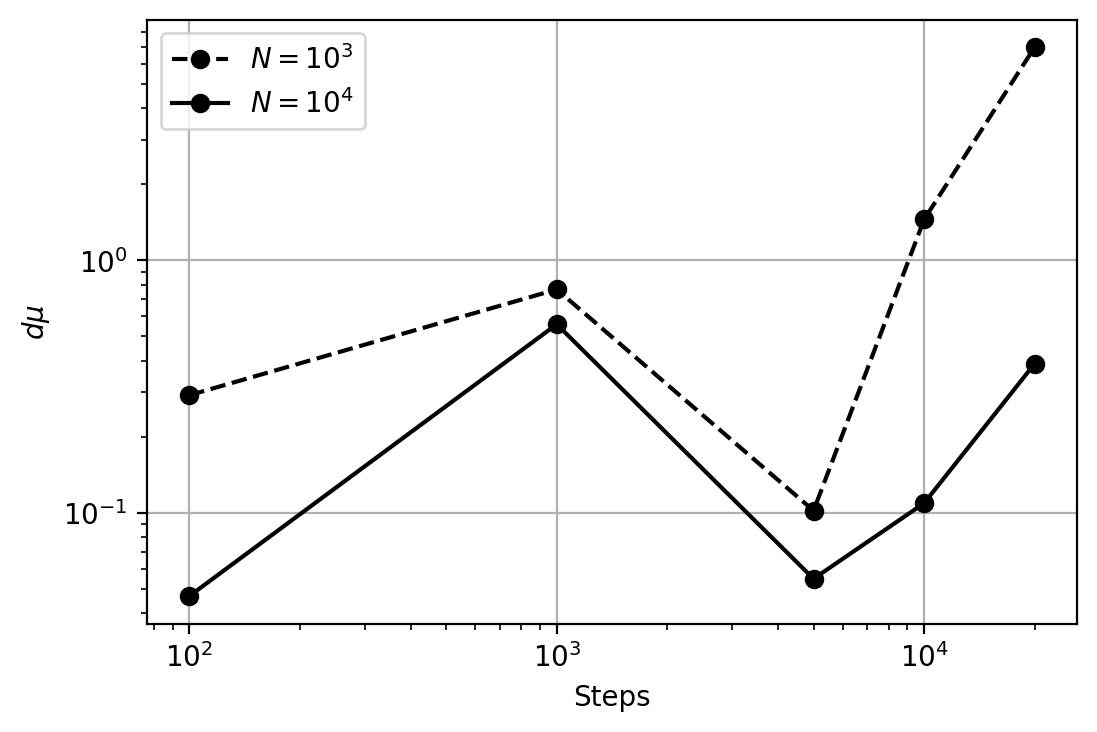

In [21]:

#plt.plot(x, dmu3, c='g', ls=':', marker='o', label=r'$N=10^2$')
plt.plot(x, dmu1, c='k', ls='--', marker='o', label=r'$N=10^3$')
plt.plot(x,dmu2, c='k', ls='-', marker='o', label=r'$N=10^4$')
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlabel('Steps')
plt.ylabel(r'$d\mu$')

plt.legend(loc='best');

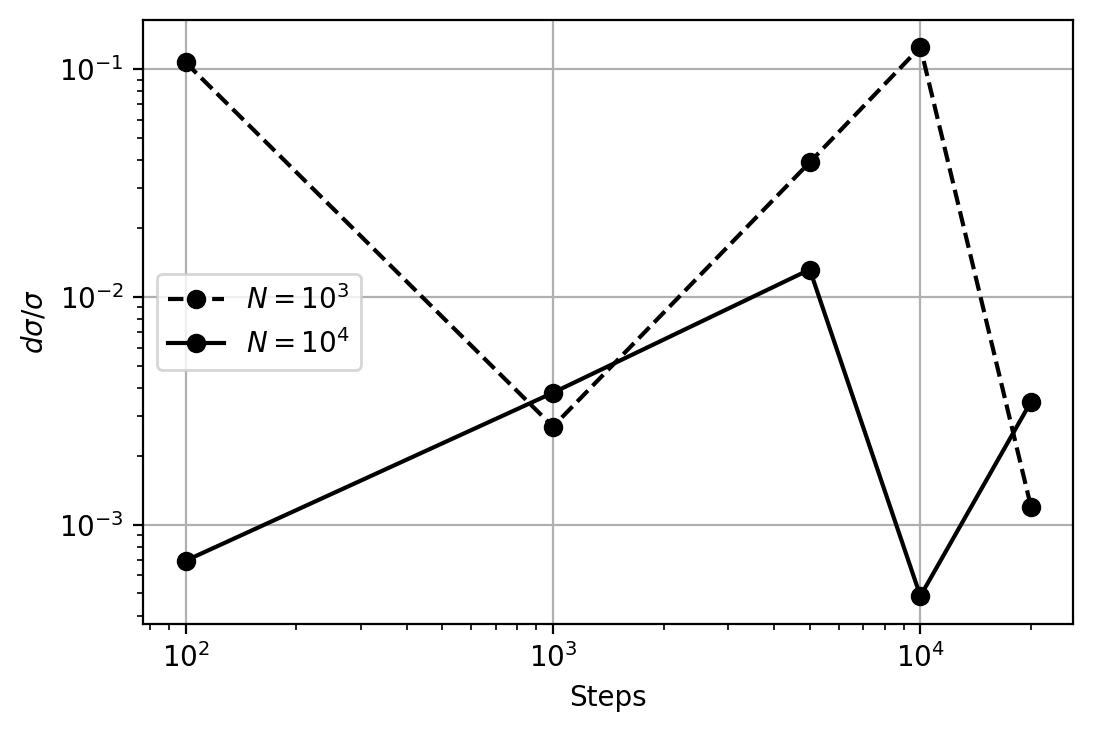

In [22]:
#plt.plot(x, dsig3, c='g', ls=':', marker='o', label=r'$N=10^2$')
plt.plot(x, dsig1, c='k', ls='--', marker='o', label=r'$N=10^3$')
plt.plot(x,dsig2, c='k', ls='-', marker='o', label=r'$N=10^4$')
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlabel('Steps')
plt.ylabel(r'$d\sigma/\sigma$')

plt.legend(loc='best');

In [23]:
D1 = [519903,497242,539941,487490,498756]
D2 = [502463,496117,513361,499512,496531]
D3 = [478762,394293,495164,545552,436394]

D_teo = 500000
D1  = np.array(D1)
D2  = np.array(D2)
D3  = np.array(D3)

dD1 = np.abs(D1-D_teo)/D_teo
dD2 = np.abs(D2-D_teo)/D_teo
dD3 = np.abs(D3-D_teo)/D_teo

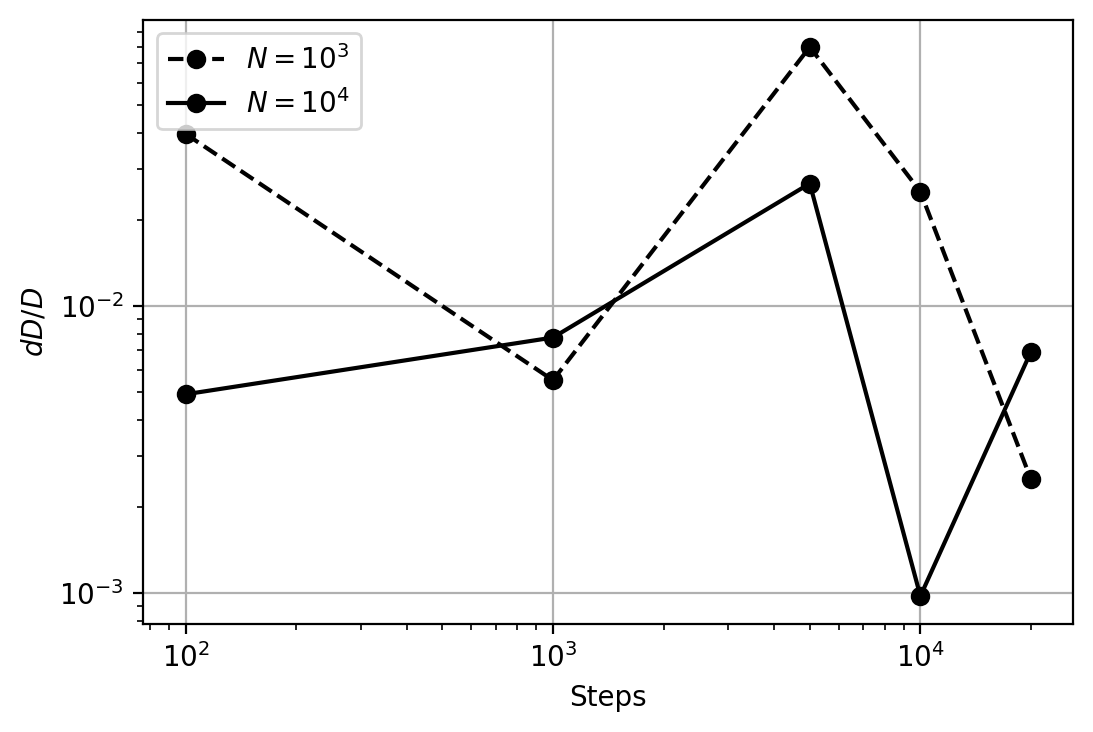

In [24]:
#plt.plot(x, dD3, c='g', ls=':', marker='o', label=r'$N=10^2$')
plt.plot(x, dD1, c='k', ls='--', marker='o', label=r'$N=10^3$')
plt.plot(x,dD2, c='k', ls='-', marker='o', label=r'$N=10^4$')
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlabel('Steps')
plt.ylabel(r'$dD/D$')

plt.legend(loc='best');